# LOB CITY DATA - PROJECT 1

## Evaluating Steph Curry's 2nd MVP Season

## 1. Exploratory Data Analysis

In [526]:
#import required packages

%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [527]:
#preview local files
! ls

LCD1 - Steph 15-16.ipynb all-graphs
SHOOTING DATA.xlsx       final-csv-data


In [528]:
#import the datasets and preprocess

df_top_100 = pd.read_csv('final-csv-data/TOP 100.csv')
df_steph = pd.read_csv('final-csv-data/STEPH CAREER.csv')

df_steph.replace('Did Not Play',np.nan,inplace=True)
df_steph.replace('Inactive',np.nan,inplace=True)
df_steph.replace('Did Not Dress',np.nan,inplace=True)

In [504]:
#preview Top 100 data

print(df_top_100.head())

#view column headings

print(df_top_100.columns)

#NB 3PA.1 contains 3PA per 100 possessions data

   Rk         Player   Season  Age   Tm   Lg    3P%  3PA    TS%   G  ...    \
0   1    Kyle Korver  2014-15   33  ATL  NBA  0.492  449  0.699  75  ...     
1   2     Tim Legler  1995-96   29  WSB  NBA  0.522  245  0.688  77  ...     
2   3    Steve Novak  2011-12   28  NYK  NBA  0.472  282  0.684  54  ...     
3   4  Stephen Curry  2017-18   29  GSW  NBA  0.423  501  0.675  51  ...     
4   5  Stephen Curry  2015-16   27  GSW  NBA  0.454  886  0.669  79  ...     

   AST  STL  BLK  TOV   PF   PTS    FG%    2P%   eFG%    FT%  
0  4.1  1.1  0.9  2.3  3.0  19.3  0.487  0.470  0.671  0.898  
1  3.9  1.3  0.3  1.3  4.1  20.9  0.507  0.488  0.646  0.863  
2  0.6  0.8  0.5  1.1  3.0  24.1  0.478  0.509  0.675  0.846  
3  9.2  2.4  0.2  4.5  3.4  39.8  0.495  0.595  0.618  0.921  
4  9.4  3.0  0.3  4.7  2.9  42.5  0.504  0.566  0.630  0.908  

[5 rows x 33 columns]
Index(['Rk', 'Player', 'Season', 'Age', 'Tm', 'Lg', '3P%', '3PA', 'TS%', 'G',
       'GS', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '

In [505]:
#preview Steph Curry's career data

print(df_steph.head())

#view column headings

print(df_steph.columns)

   Rk    G Season     Age   Tm  Opp      W/L GS     MP    MP1 ...  DRB TRB  \
0   1  1.0  09-10  21-228  GSW  HOU   L (-1)  1  35.39  35:39 ...    1   2   
1   2  2.0  09-10  21-230  GSW  PHO  L (-22)  1  39.05  39:05 ...    2   2   
2   3  3.0  09-10  21-235  GSW  MEM   W (+8)  1  28.27  28:27 ...    5   5   
3   4  4.0  09-10  21-237  GSW  LAC  L (-28)  1  21.32  21:32 ...    1   1   
4   5  5.0  09-10  21-239  GSW  SAC  L (-13)  1  31.15  31:15 ...    3   4   

  AST STL BLK TOV PF PTS  GmSc  +/-  
0   7   4   0   2  2  14  15.5    7  
1   4   1   0   3  5  12   7.1  -19  
2   9   2   0   1  4   7  11.2   -4  
3   3   0   0   0  6   5   1.5  -13  
4   6   0   0   5  4   9   3.4   -5  

[5 rows x 30 columns]
Index(['Rk', 'G', 'Season', 'Age', 'Tm', 'Opp', 'W/L', 'GS', 'MP', 'MP1', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')


In [506]:
#set relevant variables

threes = df_top_100['3P%']
attempts = df_top_100['3PA.1']
t_shoot = df_top_100['TS%']
steph = df_steph.groupby('Season')
steph_16 = steph.get_group('15-16')
steph_17 = steph.get_group('16-17')
steph_18 = steph.get_group('17-18')
steph_recent = pd.concat([steph_16,steph_17,steph_18])

In [507]:
#preview season of interest(SOI) stats

print(df_top_100.iloc[4])

Rk                    5
Player    Stephen Curry
Season          2015-16
Age                  27
Tm                  GSW
Lg                  NBA
3P%               0.454
3PA                 886
TS%               0.669
G                    79
GS                   79
MP                 2700
FG                 14.4
FGA                28.6
2P                  7.2
2PA                12.7
3P                  7.2
3PA.1              15.9
FT                  6.5
FTA                 7.2
ORB                 1.2
DRB                 6.5
TRB                 7.7
AST                 9.4
STL                   3
BLK                 0.3
TOV                 4.7
PF                  2.9
PTS                42.5
FG%               0.504
2P%               0.566
eFG%               0.63
FT%               0.908
Name: 4, dtype: object


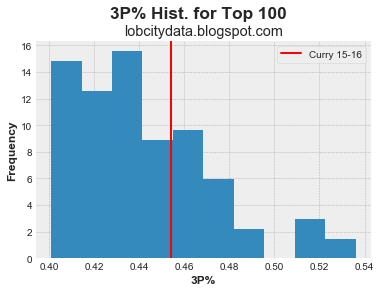

In [508]:
#plot histogram of 3P% for the top 100 seasons 

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

_ = plt.hist(threes,bins=int(np.sqrt(len(threes))),density=True)
_ = plt.xlabel('3P%',weight='bold')
_ = plt.ylabel('Frequency',weight='bold')
_ = plt.suptitle('3P% Hist. for Top 100',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axvline(x=df_top_100['3P%'][4],color='r',label='Curry 15-16')
_ = plt.legend(frameon=True)

_ = plt.savefig('3PP_HIST_TOP.png',dpi=400,bbox_inches='tight')
plt.show()

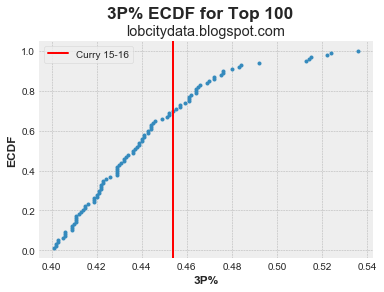

In [509]:
#plot ecdf of 3P% for the top 100 seasons

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

x = np.sort(threes)
y = np.arange(1,len(x)+1)/len(x)

_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('3P%',weight='bold')
_ = plt.ylabel('ECDF',weight='bold')
_ = plt.suptitle('3P% ECDF for Top 100',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axvline(x=df_top_100['3P%'][4],color='r',label='Curry 15-16')
_ = plt.legend(frameon=True)

_ = plt.savefig('3PP_ECDF_TOP.png',dpi=400,bbox_inches='tight')
plt.show()

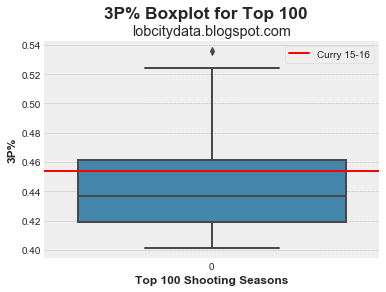

In [510]:
#display boxplot of 3P% for the top 100 seasons
plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

_ = sns.boxplot(data=threes,)
_ = plt.xlabel('Top 100 Shooting Seasons',weight='bold')
_ = plt.ylabel('3P%',weight='bold')
_ = plt.suptitle('3P% Boxplot for Top 100',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axhline(y=df_top_100['3P%'][4],color='r',label='Curry 15-16')
_ = plt.legend(frameon=True)

_ = plt.savefig('3PP_BOX_TOP.png',dpi=400,bbox_inches='tight')
plt.show()

In [511]:
#calculate quantitative EDA stats for the top 100 seasons 3P%

print('mean = ', np.mean(threes), '%')
print('median = ', np.median(threes), '%')
print('quartiles = ', np.percentile(threes,[25,50,75]), '(%)')
print('variance =', np.var(threes))
print('standard deviation =', np.std(threes))
print('min value =', min(threes))
print('max value =', max(threes))

mean =  0.44161 %
median =  0.4365 %
quartiles =  [0.419  0.4365 0.461 ] (%)
variance = 0.0009057179000000004
standard deviation = 0.030095147449381278
min value = 0.401
max value = 0.536


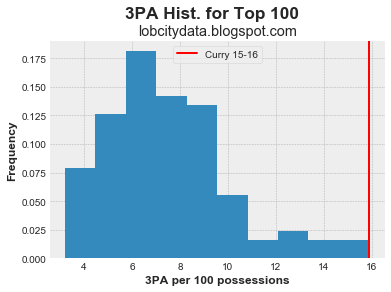

In [512]:
#plot histogram of pace adjusted 3PA for the top 100 seasons

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

_ = plt.hist(attempts,density=True,bins=int(np.sqrt(len(attempts))))
_ = plt.xlabel('3PA per 100 possessions',weight='bold')
_ = plt.ylabel('Frequency',weight='bold')
_ = plt.suptitle('3PA Hist. for Top 100',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axvline(x=df_top_100['3PA.1'][4],color='r',label='Curry 15-16')
_ = plt.legend(frameon=True)

_ = plt.savefig('3PA_HIST_TOP.png',dpi=400,bbox_inches='tight')
plt.show()

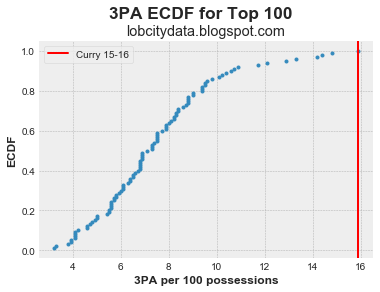

In [513]:
#plot ecdf of pace adjusted 3PA for the top 100 seasons

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

x = np.sort(attempts)
y = np.arange(1,len(x)+1)/len(x)

_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('3PA per 100 possessions',weight='bold')
_ = plt.ylabel('ECDF',weight='bold')
_ = plt.suptitle('3PA ECDF for Top 100',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axvline(x=df_top_100['3PA.1'][4],color='r',label='Curry 15-16')
_ = plt.legend(frameon=True)

_ = plt.savefig('3PA_ECDF_TOP.png',dpi=400,bbox_inches='tight')
plt.show()

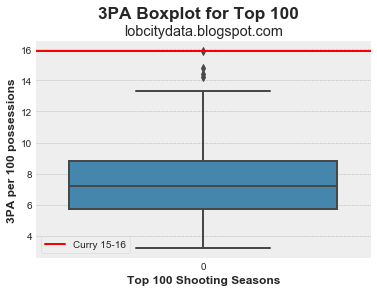

In [514]:
#plot boxplot of pace adjusted 3PA for the top 100 seasons

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

_ = sns.boxplot(data=attempts)
_ = plt.xlabel('Top 100 Shooting Seasons',weight='bold')
_ = plt.ylabel('3PA per 100 possessions',weight='bold')
_ = plt.suptitle('3PA Boxplot for Top 100',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axhline(y=df_top_100['3PA.1'][4],color='r',label='Curry 15-16')
_ = plt.legend(frameon=True)

_ = plt.savefig('3PA_BOX_TOP.png',dpi=400,bbox_inches='tight')
plt.show()

In [515]:
#calculate quantitative EDA stats for the top 100 seasons 3PA

print('mean = ', np.mean(attempts), '%')
print('median = ', np.median(attempts), '%')
print('quartiles = ', np.percentile(attempts,[25,50,75]), '(%)')
print('variance =', np.var(attempts))
print('standard deviation =', np.std(attempts))
print('min value =', min(attempts))
print('max value =', max(attempts))

mean =  7.518 %
median =  7.199999999999999 %
quartiles =  [5.7 7.2 8.8] (%)
variance = 6.646075999999998
standard deviation = 2.5779984484091525
min value = 3.2
max value = 15.9


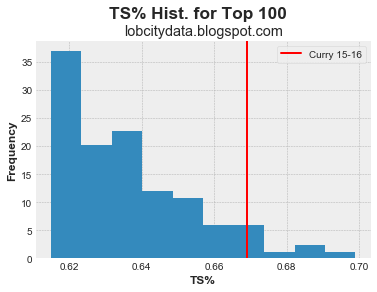

In [516]:
#plot histogram of TS% for the top 100 seasons 

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

_ = plt.hist(t_shoot,density=True,bins=int(np.sqrt(len(t_shoot))))
_ = plt.xlabel('TS%',weight='bold')
_ = plt.ylabel('Frequency',weight='bold')
_ = plt.suptitle('TS% Hist. for Top 100',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axvline(x=t_shoot[4],color='r',label='Curry 15-16')
_ = plt.legend(frameon=True)

_ = plt.savefig('TS_HIST_TOP.png',dpi=400,bbox_inches='tight')
plt.show()

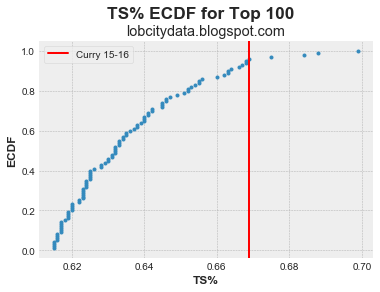

In [517]:
#plot ecdf of TS% for the top 100 seasons

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

x = np.sort(t_shoot)
y = np.arange(1,len(x)+1)/len(x)

_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('TS%',weight='bold')
_ = plt.ylabel('ECDF',weight='bold')
_ = plt.suptitle('TS% ECDF for Top 100',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axvline(x=t_shoot[4],color='r',label='Curry 15-16')
_ = plt.legend(frameon=True)

_ = plt.savefig('TS_ECDF_TOP.png',dpi=400,bbox_inches='tight')
plt.show()

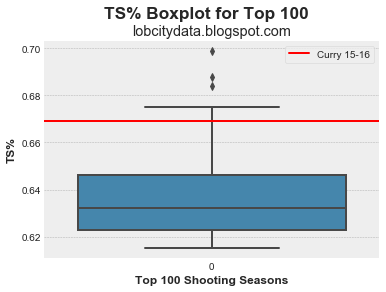

In [518]:
#plot boxplot of TS% for the top 100 seasons

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

_ = sns.boxplot(data=t_shoot)
_ = plt.xlabel('Top 100 Shooting Seasons',weight='bold')
_ = plt.ylabel('TS%',weight='bold')
_ = plt.suptitle('TS% Boxplot for Top 100',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axhline(y=t_shoot[4],color='r',label='Curry 15-16')
_ = plt.legend(frameon=True)

_ = plt.savefig('TS_BOX_TOP.png',dpi=400,bbox_inches='tight')
plt.show()

In [519]:
#calculate quantitative EDA stats for the top 100 seasons 3PA

print('mean = ', np.mean(t_shoot), '%')
print('median = ', np.median(t_shoot), '%')
print('quartiles = ', np.percentile(t_shoot,[25,50,75]), '(%)')
print('variance =', np.var(t_shoot))
print('standard deviation =', np.std(t_shoot))
print('min value =', min(t_shoot))
print('max value =', max(t_shoot))

mean =  0.6362199999999997 %
median =  0.632 %
quartiles =  [0.62275 0.632   0.646  ] (%)
variance = 0.0003349915999999998
standard deviation = 0.018302775745771455
min value = 0.615
max value = 0.6990000000000001


## 2. Permutation Testing

### 3PA Hypothesis Test

#### 15-16 Season vs. Career

p-value:  0.0


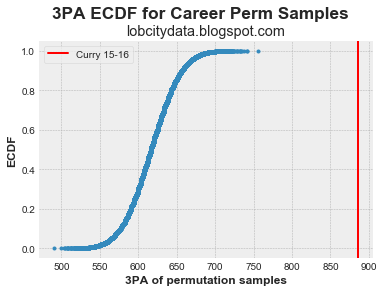

In [520]:
#Null Hypothesis: Steph's volume of three point shooting in 2015-16 is consistent with his volume across his career.
#This is a hypothesis of exchangeability 
#Test Statistic: Sum of 3PA across 79 games

#join the relevant data sets and hold them in a numpy array

career_threes = pd.to_numeric(df_steph['3PA']).dropna()

#generate permutation samples

np.random.seed(99) #seed the pseudo-random generator
perm_3pa = np.random.permutation(career_threes)
perm_avgs = np.empty(50000) #initialize empty array to hold permuted seasons

#generate 50000 seasons worth of samples, and append each total to the array
for i in range(50000):
    perm_3pa_sample = np.random.choice(perm_3pa,size=79)
    perm_stat = np.sum(perm_3pa_sample)
    perm_avgs[i] = perm_stat

#plot ecdf
x = np.sort(perm_avgs)
y = np.arange(1,len(x)+1)/len(x)

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('3PA of permutation samples',weight='bold')
_ = plt.ylabel('ECDF',weight='bold')
_ = plt.suptitle('3PA ECDF for Career Perm Samples',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axvline(x=df_top_100['3PA'][4],color='r',label='Curry 15-16')
_ = plt.legend(frameon=True)

#calculate p-value
answer = np.sum(perm_avgs>=df_top_100['3PA'][4])/len(perm_avgs)
print('p-value: ',answer)

_ = plt.savefig('3PA_ECDF_PERM_ALL.png',dpi=400,bbox_inches='tight')
plt.show()

#### 15-16 Season vs. 16-18 Seasons

p-value:  0.00768


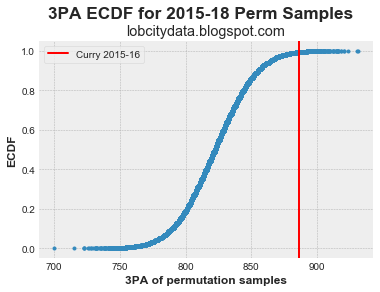

In [521]:
#Null Hypothesis: Steph's volume of three point shooting in 2015-16 is consistent with his volume since then.
#This is a hypothesis of exchangeability 
#Test Statistic: Sum of 3PA across 79 games

#join the relevant data sets and hold them in a numpy array

recent_threes = pd.to_numeric(steph_recent['3PA']).dropna()

#generate permutation samples

np.random.seed(99) #seed the pseudo-random generator
perm_recent_3pa = np.random.permutation(recent_threes)
perm_recent_avgs = np.empty(50000) #initialize empty array to hold permuted seasons

#generate 50000 seasons worth of samples, and append each total to the array
for i in range(50000):
    perm_recent_sample = np.random.choice(perm_recent_3pa,size=79)
    perm_stat = np.sum(perm_recent_sample)
    perm_recent_avgs[i] = perm_stat

#plot ecdf
x = np.sort(perm_recent_avgs)
y = np.arange(1,len(x)+1)/len(x)

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('3PA of permutation samples',weight='bold')
_ = plt.ylabel('ECDF',weight='bold')
_ = plt.suptitle('3PA ECDF for 2015-18 Perm Samples',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axvline(x=df_top_100['3PA'][4],color='r',label='Curry 2015-16')
_ = plt.legend(frameon=True)

#calculate p-value
answer = np.sum(perm_recent_avgs>=df_top_100['3PA'][4])/len(perm_recent_avgs)
print('p-value: ',answer)

_ = plt.savefig('3PA_ECDF_PERM_1518.png',dpi=400,bbox_inches='tight')
plt.show()

### Hypothesis Test of 3PA/3P% Correlation

#### Correlation Statistics of the Top 100 Shooting Seasons

pearson r value:  -0.050653704574489616


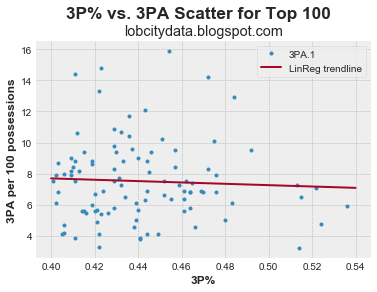

In [522]:
#define function to compute pearson-r

def pearson_r(x,y):
    return np.corrcoef(x,y)[0,1]

#plot scatter with linear regression of 3PA vs. 3P%

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

_ = plt.plot(threes,attempts,marker='.',linestyle='none')
_ = plt.xlabel('3P%',weight='bold')
_ = plt.ylabel('3PA per 100 possessions',weight='bold')
_ = plt.suptitle('3P% vs. 3PA Scatter for Top 100',size='xx-large',weight='bold',y=1)

a,b = np.polyfit(threes,attempts,1)
x = np.array([0.4,0.54])
y = a*x + b
_ = plt.plot(x,y,label='LinReg trendline')

_ = plt.legend(frameon=True)

#calculate pearson-r

real_p = pearson_r(threes,attempts)
print('pearson r value: ',real_p)

_ = plt.savefig('3P_SCATTER_TOP.png',dpi=400,bbox_inches='tight')
plt.show()

#### Hypothesis Test of Correlation

pearson-r value of data:  -0.050653704574489616
mean pearson-r value of permutations:  -0.00033466260918174444
p-value:  0.6859


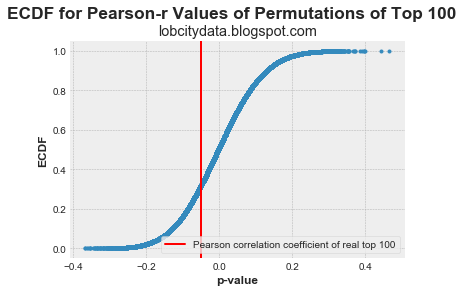

In [523]:
#Null hypothesis: 3P% is not correlated with 3PA among all time great shooting seasons.
#Test statistic: Pearson Correlation Coefficient

perm_replicates = np.empty(50000) #initialize an empty array

#generate 50000 values of pearson_r from permutations
for i in range(50000):
    permuted_threes = np.random.permutation(threes)
    perm_replicates[i] = pearson_r(permuted_threes,attempts)
    
#plot ecdf
x = np.sort(perm_replicates)
y = np.arange(1,len(x)+1)/len(x)

plt.style.use('bmh')
_ = plt.title('lobcitydata.blogspot.com')

_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('p-value',weight='bold')
_ = plt.ylabel('ECDF',weight='bold')
_ = plt.suptitle('ECDF for Pearson-r Values of Permutations of Top 100',size='xx-large',weight='bold',y=1)

#include SOI
_ = plt.axvline(x=real_p,color='r',label='Pearson correlation coefficient of real top 100')
_ = plt.legend(frameon=True)

#calculate p-value
mean_pearson = np.mean(perm_replicates)    
p = np.sum(perm_replicates >= real_p)/len(perm_replicates)

print('pearson-r value of data: ',real_p)
print('mean pearson-r value of permutations: ',mean_pearson)
print('p-value: ', p)

_ = plt.savefig('PEARSON_ECDF_PERM.png',dpi=400,bbox_inches='tight')
plt.show()